In [121]:
import os,sys
os.chdir('../')
sys.path.append('./src/probability')
sys.path.append('./src/data')
sys.path.append('./src/events')
from event_processing import to_hist
from importerDC import get_aeff_df_dc, get_systematics, get_DC_MC
from processerDC import interpolate_flux_DC, process_aeff, get_flux
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')


In [2]:
interp_flux = interpolate_flux_DC()
df_list = get_aeff_df_dc()
e_list = process_aeff(df_list[0])
ebar_list = process_aeff(df_list[1])
mu_list = process_aeff(df_list[2])
mubar_list = process_aeff(df_list[3])
tau_list = process_aeff(df_list[4])
taubar_list = process_aeff(df_list[5])
nc_list = process_aeff(df_list[6])
ncbar_list = process_aeff(df_list[7])

In [77]:
Ereco = 10**np.linspace(0.80,1.75,9)
zreco = np.linspace(-1,0,9)#[0:-1]
livetime = 953*24*3600

In [4]:
e_res = []
for aeff_df in e_list:
    aeff_df['flux'] = get_flux('e',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_E*aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.flux
    e_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
e_res = np.array(e_res).reshape(8,8)

ebar_res = []
for aeff_df in ebar_list:
    aeff_df['flux'] = get_flux('ebar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_EBar*aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.flux
    ebar_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
ebar_res = np.array(ebar_res).reshape(8,8)

mu_res = []
for aeff_df in mu_list:
    aeff_df['flux'] = get_flux('m',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_Mu*aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.flux
    mu_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
mu_res = np.array(mu_res).reshape(8,8)

mubar_res = []
for aeff_df in mubar_list:
    aeff_df['flux'] = get_flux('mbar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.aeff_Mubar*aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.flux
    mubar_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
mubar_res = np.array(mubar_res).reshape(8,8)

nc_res = []
for aeff_df in nc_list:
    aeff_df['flux_e'] = get_flux('e',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['flux_m'] = get_flux('m',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.aeff_X*(aeff_df.flux_e + aeff_df.flux_m)
    nc_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
nc_res = np.array(nc_res).reshape(8,8)

ncbar_res = []
for aeff_df in ncbar_list:
    aeff_df['flux_ebar'] = get_flux('ebar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['flux_mbar'] = get_flux('mbar',10**aeff_df.E_avg,aeff_df.z_avg,interp_flux)
    aeff_df['volume'] = (aeff_df.Emax-aeff_df.Emin)*(aeff_df.zmax-aeff_df.zmin)     *aeff_df.DOMeff*aeff_df.ICEeff*aeff_df.aeff_XBar*(aeff_df.flux_ebar + aeff_df.flux_mbar)
    ncbar_res.append(np.sum(aeff_df.volume)*livetime*2*np.pi)
ncbar_res = np.array(ncbar_res).reshape(8,8)


In [87]:
res = mu_res+mubar_res#e_res+ebar_res+mu_res+mubar_res#+nc_res+ncbar_res
#Får bättre fit med bara mu ...

In [6]:
MC_list = get_DC_MC()

In [18]:
res_E = np.sum(res,axis=1)
res_z = np.sum(res,axis=0)

In [126]:
[0.88]*8

[0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88]

Text(-1.1, 1, 'Events')

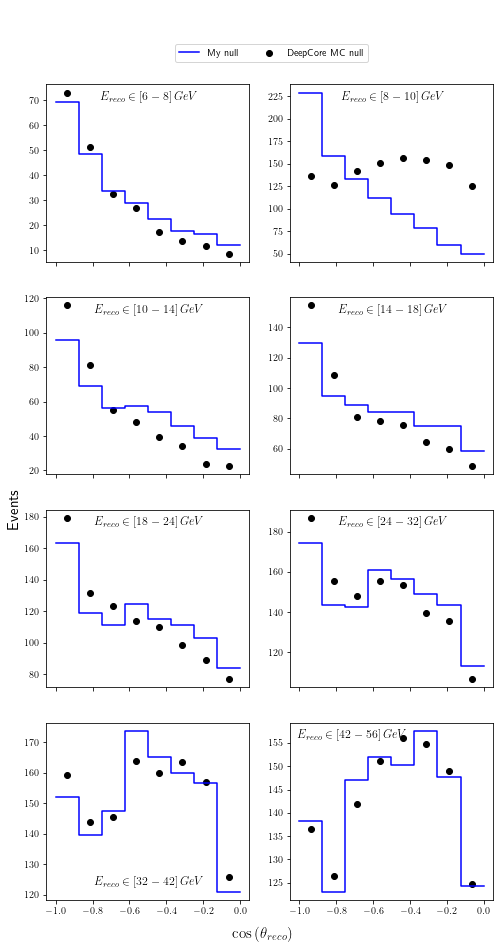

In [131]:
from scipy.optimize import leastsq 
fig, ax = plt.subplots(4,2, sharex=True, squeeze=True, figsize=(8,15))
ax = ax.flatten()
zreco_midpoints = zreco[0:-1] +np.diff(zreco)/2
title_pos = [(0.5,0.88)]*8
title_pos[6] = (0.5,0.05)
title_pos[7] = (0.3,0.88)
Ebins = Ereco.astype(int)
for i in range(8):
    norms = leastsq(lambda x:x*res[:,i]-MC_list[i], x0=10)[0]
    res_hist = to_hist(res[:,i]*norms)
    MC_hist = to_hist(MC_list[i])
    ax[i].step(zreco, res_hist, where='post', label='My null', color='blue')
    ax[i].scatter(zreco_midpoints, MC_list[i], label='DeepCore MC null', color='black')
    ax[i].set_title(rf'$E_{{reco}} \in [{Ebins[i]}-{Ebins[i+1]}] \, GeV$',x = title_pos[i][0], y = title_pos[i][1])
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.35,0.935), ncol=2)
fig.suptitle(r'$\cos{(\theta_{{reco}})}$',y=0.1,fontsize=15)
fig.tight_layout()
ax[4].set_ylabel('Events', fontsize=15, x=-1.1,y=1)